In [1]:
#----------------importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#importing the dataset
dataset = pd.read_csv("dataset.csv")
dataset = dataset.drop('age',1) #removing unwanted column
dataset = dataset.drop('sex',1) #removing unwanted column
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

In [3]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )


In [4]:
#----------------applying grid search to find best performing parameters 
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

In [5]:
#grid search is used to know best estimators
grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)
#printing best parameters 
print("Best Accurancy =" +str( grid_search.best_score_))
print("best parameters =" + str(grid_search.best_params_)) 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Accurancy =0.8105726872246696
best parameters ={'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}


In [6]:
#fitting RandomForest regression with best params 
classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
#predicting the tests set result
y_pred = classifier.predict(x_test)

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  7]
 [ 4 39]]


In [9]:
#pickle file joblib
joblib.dump(classifier, 'final_models/rf_final.pkl')

['final_models/rf_final.pkl']

In [10]:
#-------------Features Importance random forest
names = dataset.iloc[:,:-1].columns
importances =classifier.feature_importances_
sorted_importances = sorted(importances, reverse=True)
indices = np.argsort(-importances)
var_imp = pd.DataFrame(sorted_importances, names[indices], columns=['importance'])


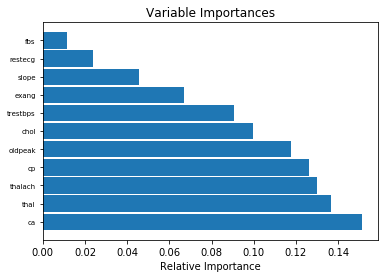

In [11]:
#-------------plotting variable importance
plt.title("Variable Importances")
plt.barh(np.arange(len(names)), sorted_importances, height = 0.9)
plt.yticks(np.arange(len(names)), names[indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()